In [1]:
import matplotlib.pyplot as plt
def plot_behaviers(file_name):
    # plot actions
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                     
    plt.figure()
    #plit.subplot(1,2,1)
    plt.plot(action_values)

In [2]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

### 目前设定  
#### 奖励函数  
```  
 if pose.position.z < self.target_z:
            """飞行方向惩罚"""
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(1,punish) 
        elif pose.position.z > self.target_z:
            """高度偏离惩罚"""
            reward+=-abs(self.target_z-pose.position.z)*10
        
        """高度目标奖励"""
        if timestamp > 1: 
            if abs(pose.position.z-self.target_z) < 0.3:
                self.target_hit+=1
                reward+=10*(self.target_hit)**2
                
        """阶段结束条件"""
        if pose.position.z > self.height_limit:
            reward-=100
            done=True
        if timestamp > self.max_duration:
            done=True
```
#### DDPG模型  
* <div style="color:red"> states取4维  [z,ox,oy,oz]</div>
* soft update 参数 0.001
* gamma 0.99
* Memory   按优先级存储/取样
   * 容量 1000
   * 一次取样量 100
   
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(400-300)
   * 激活函数 tanh
   * 批归一化
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（400-300）+ actions:300


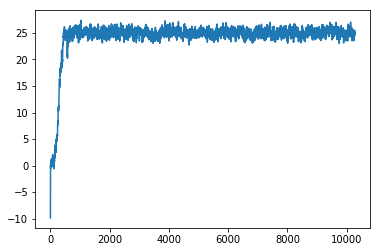

In [3]:
plot_behaviers("actions_01.txt")

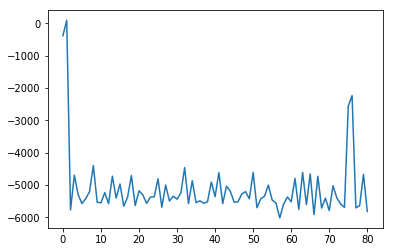

In [4]:
plot_rewards("rewards_01.txt")

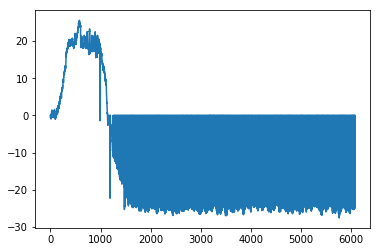

In [5]:
plot_behaviers("actions_02.txt")

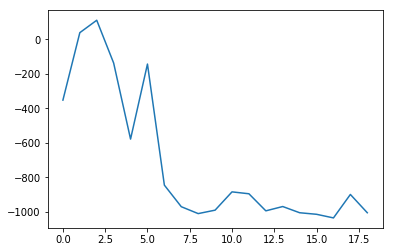

In [6]:
plot_rewards("rewards_02.txt")